# TelecomX LATAM parte 2

A partir de este punto es la parte 2 del challenge utilizando los datos de TelecomX.

## Preparacion de los datos

### Extraccion de datos


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('TelecomX.csv')
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,65.60,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,59.90,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,73.90,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,98.00,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,55.15,742.90,1.838333
7252,1.0,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,85.10,1873.70,2.836667
7253,0.0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,50.30,92.75,1.676667
7254,0.0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,67.85,4627.65,2.261667


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   int64  
 4   Dependents        7256 non-null   int64  
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   int64  
 7   MultipleLines     7256 non-null   int64  
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   int64  
 10  OnlineBackup      7256 non-null   int64  
 11  DeviceProtection  7256 non-null   int64  
 12  TechSupport       7256 non-null   int64  
 13  StreamingTV       7256 non-null   int64  
 14  StreamingMovies   7256 non-null   int64  
 15  Contract          7256 non-null   object 
 16  Charges.Monthly   7256 non-null   float64


### Eliminación de Columnas Irrelevantes

In [53]:
df = df.drop(['gender', 'Partner', 'Dependents'], axis=1)
df.head()

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,9,1,0,DSL,0,1,0,1,1,0,One year,65.6,593.30,2.186667
1,0.0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,59.9,542.40,1.996667
2,1.0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,73.9,280.85,2.463333
3,1.0,1,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,98.0,1237.85,3.266667
4,1.0,1,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,83.9,267.40,2.796667


### Encoding

In [54]:
print(df['InternetService'].unique())
print(df['Contract'].unique())

['DSL' 'Fiber optic' '0']
['One year' 'Month-to-month' 'Two year']


In [55]:
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,9,1,0,DSL,0,1,0,1,1,0,1,65.60,593.30,2.186667
1,0.0,0,9,1,1,DSL,0,0,0,0,0,1,0,59.90,542.40,1.996667
2,1.0,0,4,1,0,Fiber optic,0,0,1,0,0,0,0,73.90,280.85,2.463333
3,1.0,1,13,1,0,Fiber optic,0,1,1,0,1,1,0,98.00,1237.85,3.266667
4,1.0,1,3,1,0,Fiber optic,0,0,0,1,1,0,0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0,13,1,0,DSL,1,0,0,1,0,0,1,55.15,742.90,1.838333
7252,1.0,0,22,1,1,Fiber optic,0,0,0,0,0,1,0,85.10,1873.70,2.836667
7253,0.0,0,2,1,0,DSL,0,1,0,0,0,0,0,50.30,92.75,1.676667
7254,0.0,0,67,1,0,DSL,1,0,1,1,0,1,2,67.85,4627.65,2.261667


In [56]:
df['InternetService'] = df['InternetService'].map({'0': 0, 'DSL': 1, 'Fiber optic': 2})
df

,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,9,1,0,1,0,1,0,1,1,0,1,65.60,593.30,2.186667
1,0.0,0,9,1,1,1,0,0,0,0,0,1,0,59.90,542.40,1.996667
2,1.0,0,4,1,0,2,0,0,1,0,0,0,0,73.90,280.85,2.463333
3,1.0,1,13,1,0,2,0,1,1,0,1,1,0,98.00,1237.85,3.266667
4,1.0,1,3,1,0,2,0,0,0,1,1,0,0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0,13,1,0,1,1,0,0,1,0,0,1,55.15,742.90,1.838333
7252,1.0,0,22,1,1,2,0,0,0,0,0,1,0,85.10,1873.70,2.836667
7253,0.0,0,2,1,0,1,0,1,0,0,0,0,0,50.30,92.75,1.676667
7254,0.0,0,67,1,0,1,1,0,1,1,0,1,2,67.85,4627.65,2.261667


Se realizo label encoding para las columnas de InternetService y Contract, ya que estas tenian mas de dos valores unicos por lo que no se podia hacer one hot encoding.

### Verificación de la Proporción de Cancelación (Churn)

In [57]:
df = df.dropna(subset=['Churn'])
df.reset_index(drop=True, inplace=True)
df['Churn'] = df['Churn'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   int64  
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   int64  
 13  Charges.Monthly   7032 non-null   float64
 14  Charges.Total     7032 non-null   float64
 15  Cuentas_Diarias   7032 non-null   float64
dtypes: float64(3), int32(1), int64(12)
memory 

C:\Users\admi\AppData\Local\Temp\ipykernel_14288\635223859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(int)


In [58]:
df['Churn'].unique()

array([0, 1])

In [60]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

### Balanceo de Clases (opcional)

In [61]:
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

Churn
0    5163
1    5163
Name: count, dtype: int64


C:\Users\admi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   int64  
 4   MultipleLines     7032 non-null   int64  
 5   InternetService   7032 non-null   int64  
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  StreamingTV       7032 non-null   int64  
 11  StreamingMovies   7032 non-null   int64  
 12  Contract          7032 non-null   int64  
 13  Charges.Monthly   7032 non-null   float64
 14  Charges.Total     7032 non-null   float64
 15  Cuentas_Diarias   7032 non-null   float64
dtypes: float64(3), int32(1), int64(12)
memory 

### Normalización o Estandarización (si es necesario)

## 🎯 Correlación y Selección de Variables

### Análisis de Correlación

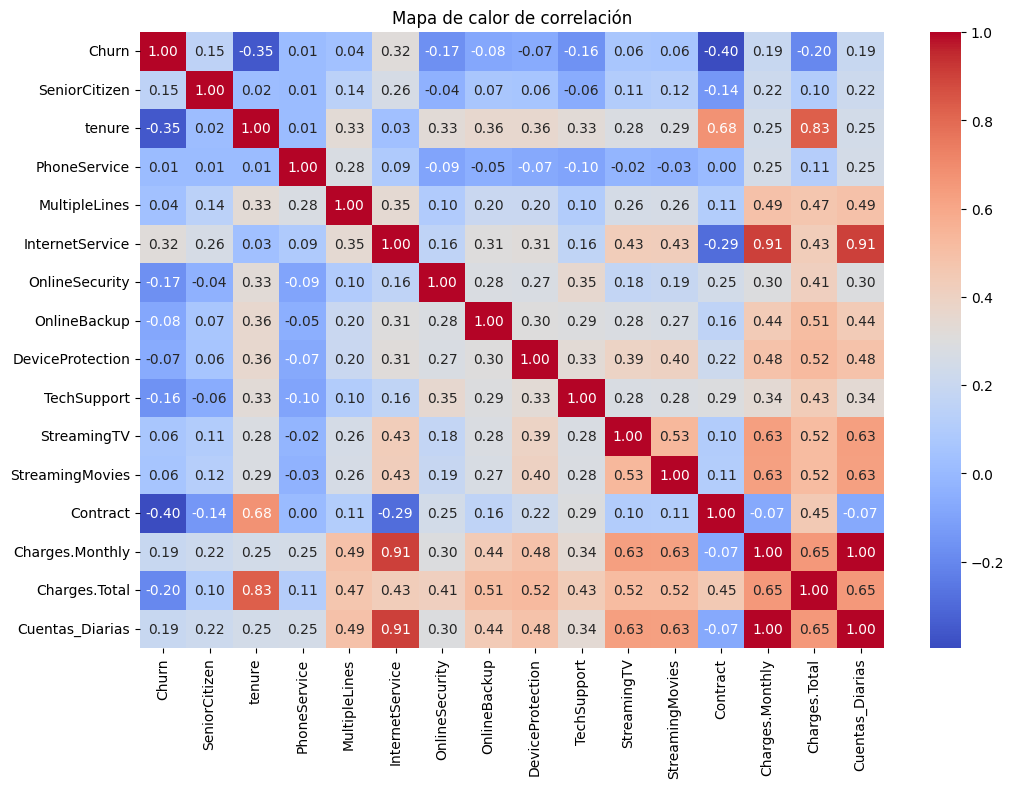

In [59]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

### Análisis Dirigido

## 🤖 Modelado Predictivo

### Separación de Datos

### Creación de Modelos

### Evaluación de los Modelos

## 📋 Interpretación y Conclusiones

### Análisis de la Importancia de las Variables

### Conclusión